In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
from pyinverse.phantom import Phantom
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid

In [4]:
na = 32
theta_deg_axis = RegularAxis(0, 180/na, na)

nt = 32
t_axis = RegularAxis.linspace(-1, 1, nt)

grid = RegularGrid(theta_deg_axis, t_axis)

In [5]:
p = Phantom()
e = p._ellipses[2]

In [6]:
e

Ellipse(rho=-0.2, a=0.11, b=0.31, x0=0.22, y0=0.0, phi=<Angle deg=-18.0 rad=-0.3141592653589793>)

In [7]:
S = e.sinogram(grid)

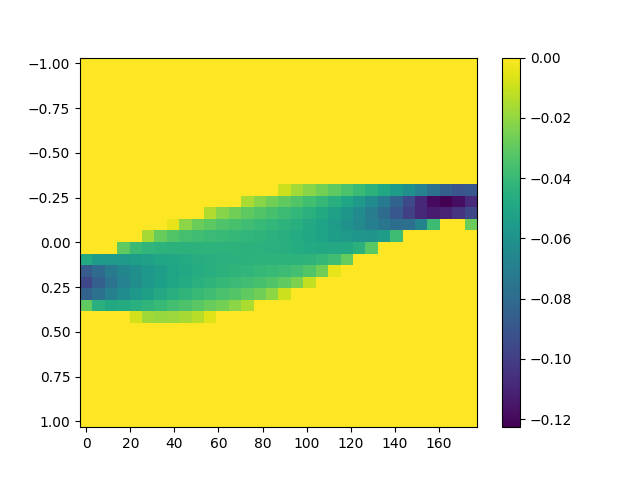

In [8]:
fig, ax = plt.subplots()
im = grid.imshow(ax, S, aspect='auto')
fig.colorbar(im)

In [9]:
S_Omega_grid, S_Omega = grid.spectrum(S, axis=0)

In [10]:
grid

<RegularGrid <axis_x: <RegularAxis x0=0 T=5.625 N=32>> <axis_y: <RegularAxis x0=-1 T=0.06451612903225806 N=32>>>

In [11]:
S_Omega_grid

<FreqRegularGrid <axis_x: <RegularAxis x0=0 T=5.625 N=32>> <axis_y: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>>>

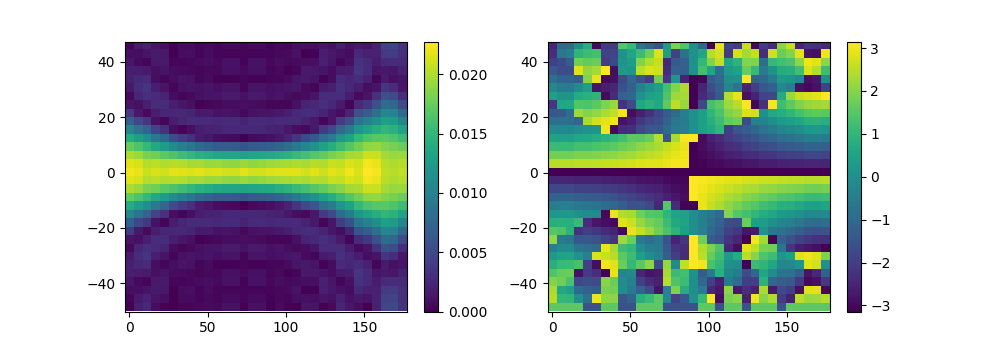

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_Omega), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_Omega), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [13]:
S_theory = e.proj_ft(S_Omega_grid.Hz(axis=0))

In [14]:
S_Omega_grid.Hz(axis=0)

<RegularGrid <axis_x: <RegularAxis x0=0 T=5.625 N=32>> <axis_y: <FFTRegularAxis x0=-7.75 T=0.484375 N=32>>>

In [15]:
S_Omega_grid.Hz(axis=0).axis_x

<RegularAxis x0=0 T=5.625 N=32>

In [16]:
S_Omega_grid

<FreqRegularGrid <axis_x: <RegularAxis x0=0 T=5.625 N=32>> <axis_y: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>>>

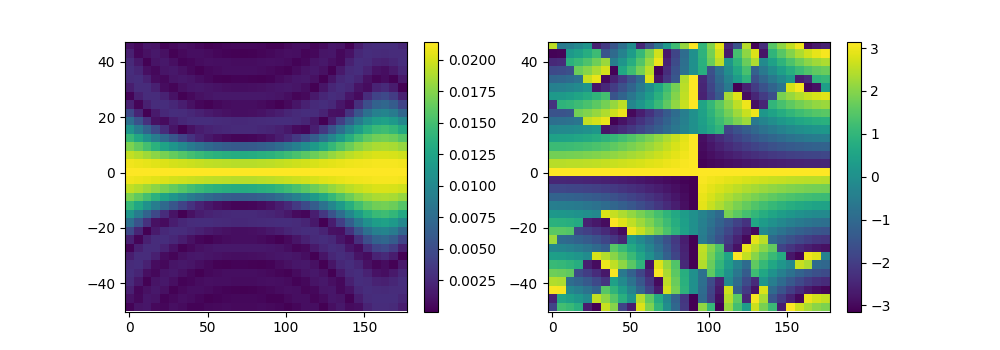

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_theory), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_theory), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [18]:
S_theory_rect = e.proj_ft(S_Omega_grid.Hz(axis=0), rect=True, a=1/grid.axis_y.T)

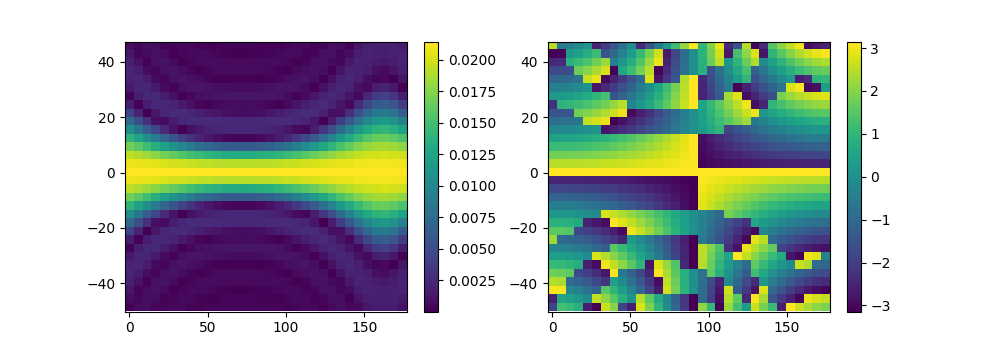

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_theory_rect), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_theory_rect), aspect='auto')
fig.colorbar(im, ax=ax[1]);